# Use Dense Neural Network for Inference on MNIST Dataset
Step 1: Load the dataset \\
Step 2: Build a neural network model based on the dataset \\
Step 3: Compile the model \\
Step 4: Train the model \\
Step 5: Inference on the test data

# Import Libraries

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset: MNIST 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
print(y_train[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# Build a dense neural network with an input layer, two hidden layers, and an output layer

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'), #256 nodes
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

# Normalize the features

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=["accuracy"],
)

# Train the neural network on MNIST dataset

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
782/782 [==============================] - 15s 18ms/step - loss: 1.8407 - accuracy: 0.3304
Epoch 2/30
782/782 [==============================] - 14s 18ms/step - loss: 1.6562 - accuracy: 0.4076
Epoch 3/30
782/782 [==============================] - 14s 17ms/step - loss: 1.5714 - accuracy: 0.4374
Epoch 4/30
782/782 [==============================] - 13s 17ms/step - loss: 1.5197 - accuracy: 0.4529
Epoch 5/30
782/782 [==============================] - 13s 17ms/step - loss: 1.4834 - accuracy: 0.4697
Epoch 6/30
782/782 [==============================] - 13s 17ms/step - loss: 1.4456 - accuracy: 0.4819
Epoch 7/30
782/782 [==============================] - 14s 18ms/step - loss: 1.4197 - accuracy: 0.4895
Epoch 8/30
782/782 [==============================] - 13s 17ms/step - loss: 1.3961 - accuracy: 0.4977
Epoch 9/30
782/782 [==============================] - 13s 17ms/step - loss: 1.3656 - accuracy: 0.5110
Epoch 10/30
782/782 [==============================] - 13s 17ms/step - loss: 1.338

In [11]:
logits=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


# Visualization

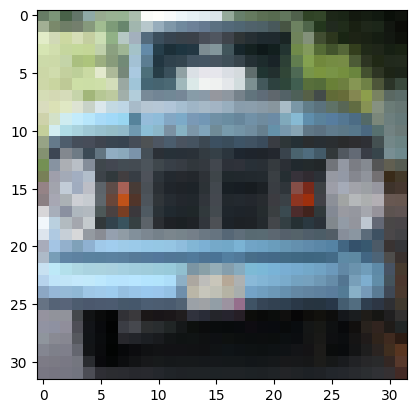

In [12]:
index=997
plt.imshow(x_test[index])

In [ ]:
np.argmax(tf.nn.softmax(logits)[index])

1

In [14]:
predictions=np.zeros(10)
for i in range(10):
   predictions[i]=np.argmax(tf.nn.softmax(logits)[i])
print(predictions)

[3. 8. 8. 8. 6. 6. 7. 6. 2. 1.]
